In [0]:
import sys
print(sys.version)

3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]


In [0]:
#GPU acceleration enabling
device = 'cuda'

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [0]:
path = untar_data(URLs.PETS); 
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_137.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_134.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_108.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_61.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_131.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)  #important to normalize

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
german_shorthaired,Ragdoll,Egyptian_Mau,Bengal,havanese
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
staffordshire_bull_terrier,american_bulldog,pug,Egyptian_Mau,chihuahua
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

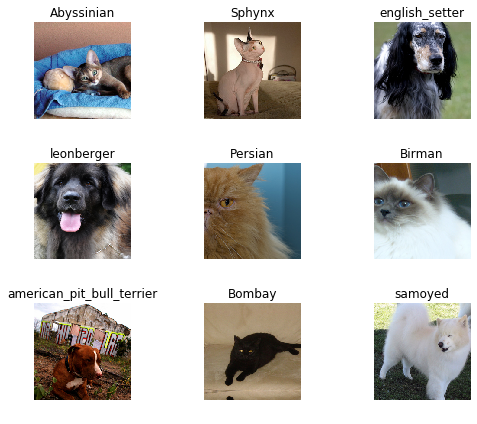

In [0]:
data.show_batch(rows=3, figsize = (7,6))

In [0]:
#seeing the labels
print(np.array(data.classes))
len(data.classes),data.c

['Abyssinian' 'Bengal' 'Birman' 'Bombay' 'British_Shorthair' 'Egyptian_Mau' 'Maine_Coon' 'Persian' 'Ragdoll'
 'Russian_Blue' 'Siamese' 'Sphynx' 'american_bulldog' 'american_pit_bull_terrier' 'basset_hound' 'beagle' 'boxer'
 'chihuahua' 'english_cocker_spaniel' 'english_setter' 'german_shorthaired' 'great_pyrenees' 'havanese' 'japanese_chin'
 'keeshond' 'leonberger' 'miniature_pinscher' 'newfoundland' 'pomeranian' 'pug' 'saint_bernard' 'samoyed'
 'scottish_terrier' 'shiba_inu' 'staffordshire_bull_terrier' 'wheaten_terrier' 'yorkshire_terrier']


(37, 37)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.356522,0.370389,0.117050,01:45
1,0.597647,0.306947,0.098106,01:46
2,0.376173,0.253776,0.081191,01:46
3,0.269214,0.244687,0.078484,01:46


In [0]:
learn.save('stage-1')

**RESULT**

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

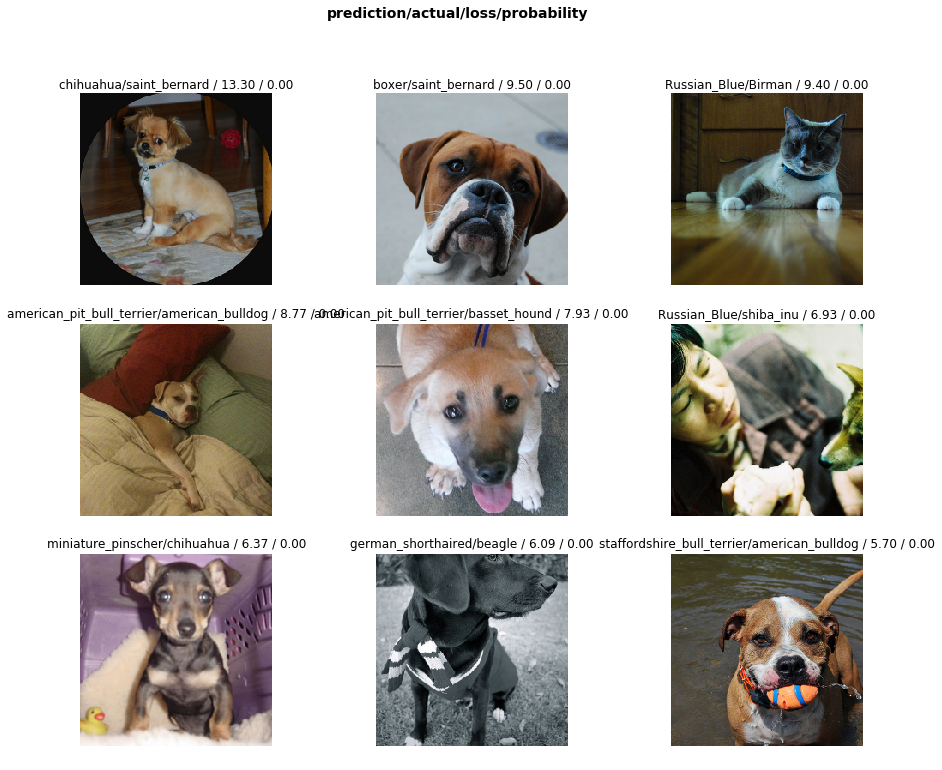

In [0]:
interp.plot_top_losses(9, figsize=(15,12))

In [0]:
doc(interp.plot_top_losses)     #Gives the documentation of a perticular function

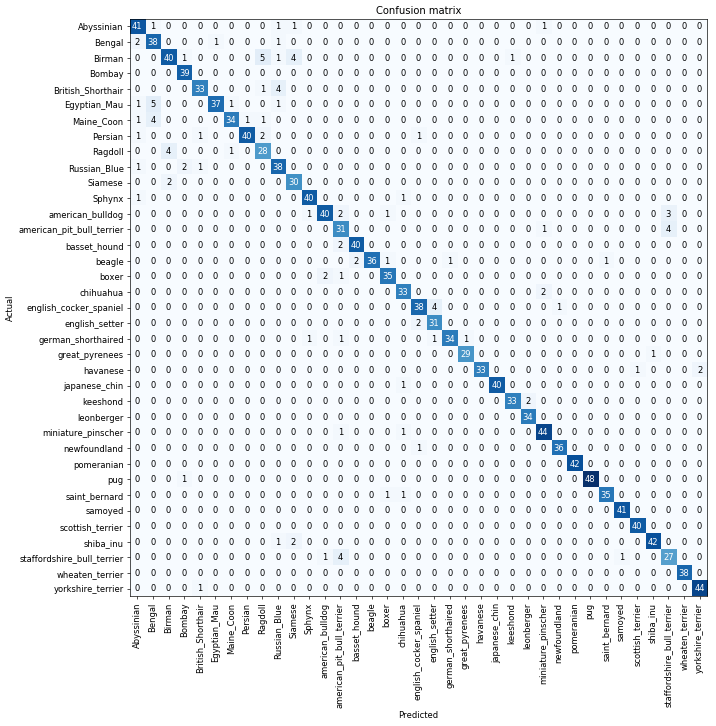

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=3)

[('Birman', 'Ragdoll', 5),
 ('Egyptian_Mau', 'Bengal', 5),
 ('Birman', 'Siamese', 4),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Maine_Coon', 'Bengal', 4),
 ('Ragdoll', 'Birman', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('english_cocker_spaniel', 'english_setter', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('american_bulldog', 'staffordshire_bull_terrier', 3)]

In [0]:
learn.lr_find() #learning rate finder

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


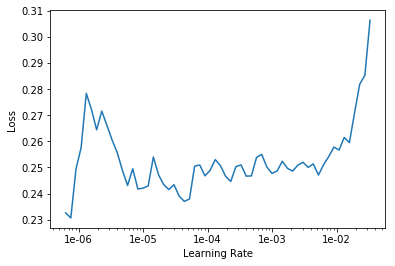

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-7, 1e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.234152,0.241757,0.077131,01:51
1,0.237345,0.240913,0.074425,01:51
